In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [5]:
def repressilator(state, t, beta):
    
    a, b, c, A, B, C, Si, Se = state
    
    # mRNA
    dadt = -a + alpha/(1+C**n)
    dbdt = -b + alpha/(1+A**n)
    dcdt = -c + alpha/(1+B**n) + kappa*Si/(1+Si)
    
    # protein
    dAdt = beta*(a-A)
    dBdt = beta*(b-B)
    dCdt = beta*(c-C)
    
    # autoinducer
    dSidt = -k0*Si + k1*A - eta*(Si-Se) # internal concentration
    dSedt = -ke*Se + kd*(Si-Se) # external concentration
    
    return dadt, dbdt, dcdt, dAdt, dBdt, dCdt, dSidt, dSedt

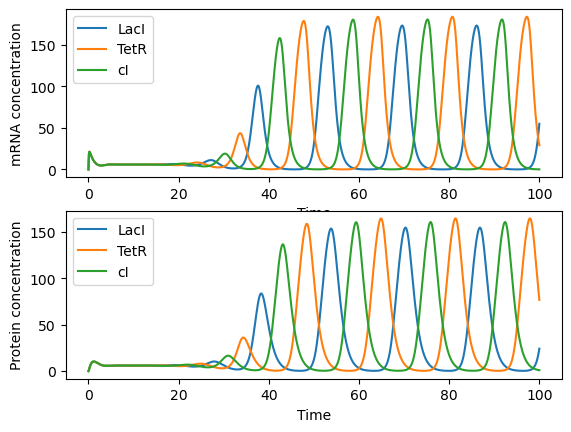

In [7]:
alpha = 216
beta = 1
kappa = 1
eta = 10
k0 = 1
k1 = 0.01
n = 1
ke = 10
kd = 60
n = 2
Q = 0.8

state0 = [0, 0, 0, 0, 0, 0, 0, 0]
Se = Q*state0[6]

t = np.linspace(0, 100, 10000)

state = odeint(repressilator, state0, t, args=(beta,))

plt.subplot(2, 1, 1)
plt.plot(t, state[:,0])
plt.plot(t, state[:,1])
plt.plot(t, state[:,2])
plt.xlabel('Time')
plt.ylabel('mRNA concentration')
plt.legend(('LacI', 'TetR', 'cI'))

plt.subplot(2, 1, 2)
plt.plot(t, state[:,3])
plt.plot(t, state[:,4])
plt.plot(t, state[:,5])
plt.xlabel('Time')
plt.ylabel('Protein concentration')
plt.legend(('LacI', 'TetR', 'cI'))

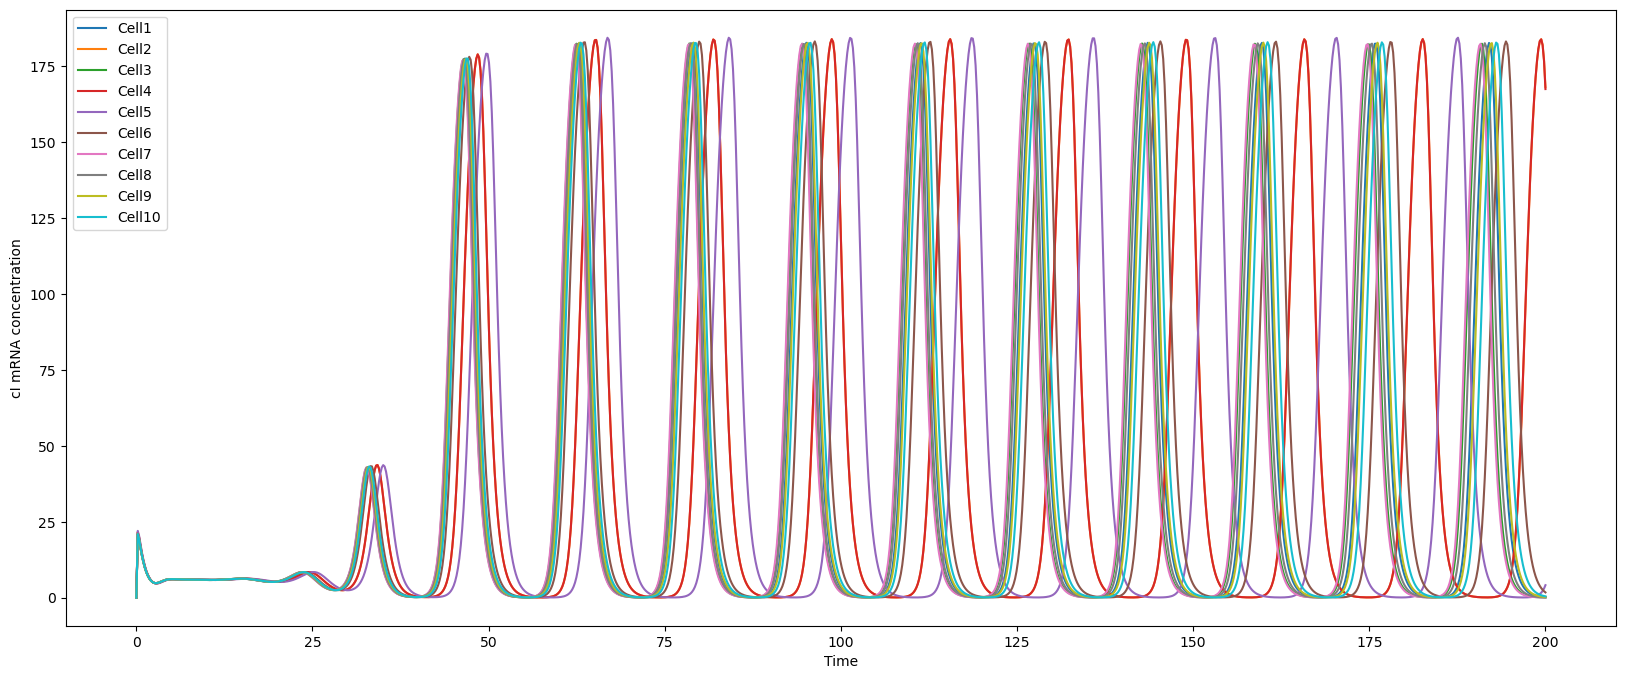

In [13]:
alpha = 216
kappa = 1
eta = 10
k0 = 1
k1 = 0.01
n = 2
ke = 10
kd = 60
Q = 0.8
mean_beta = 1
std_dev_beta = 0.05 
np.random.seed(69)
states0 = np.zeros((10000, 8))
# states0 = np.random.rand(100000,8)

t = np.linspace(0, 200, 1000)

# Solve the differential equations
Siavg = np.mean(states0[:,6])
Se = Q*Siavg
states = []
for i in range(10):
    beta = np.random.normal(loc=mean_beta, scale=std_dev_beta)
    state = odeint(repressilator, states0[i,:], t, args=(beta,))
    states.append(state)
states = np.array(states)
plt.figure(figsize = (20,8))
for i in range(10):
    plt.plot(t, states[i,:,1])
plt.xlabel('Time')
plt.ylabel('cI mRNA concentration')
plt.legend(('Cell1', 'Cell2', 'Cell3', 'Cell4', 'Cell5', 'Cell6', 'Cell7', 'Cell8', 'Cell9', 'Cell10'))